## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [55]:
# Checking the number of mice
# THERE ARE 249 UNIQUE MICE IN THIS STUDY
unique_MouseID = len(combined_df["Mouse ID"].unique())
unique_MouseID

249

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# duplicateRowsDF = dfObj[dfObj.duplicated()]
# these 5 rows have the same Mouse ID and Timepoint. But the tumor volumes and metastatic sites are different... 
duplicate_mouse = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#df.drop(index=df[df['road'] == '(R)'].index, inplace=True)
clean_df = combined_df.drop(index=combined_df[combined_df['Mouse ID'] == "g989"].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [58]:
# Checking the number of mice in the clean DataFrame.
# THE CLEAN DATA HAS ONLY 248 MICE BECAUSE I GOT RID OF MOUSE G989 (13 LINES OF DATA)
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.




In [59]:
# create grouped-by dataframe to base all the following stats off of
tumor_volume_df = clean_df[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
tumor_vol_by_drug_df = tumor_volume_df.groupby('Drug Regimen')


In [60]:
# find mean of tumor volume for each regimen
mean = tumor_vol_by_drug_df["Tumor Volume (mm3)"].mean()
#mean

# find median of tumor volume for each regimen
median = tumor_vol_by_drug_df["Tumor Volume (mm3)"].median()
#median

# find variance of tumor volume for each regimen
variance = tumor_vol_by_drug_df["Tumor Volume (mm3)"].var()
#variance

# find standard deviation of tumor volume for each regimen
std_dev = tumor_vol_by_drug_df["Tumor Volume (mm3)"].std()
#std_dev

# find SEM of tumor volume for each regimen
sem = tumor_vol_by_drug_df["Tumor Volume (mm3)"].sem()
#sem

# put these values into a dataframe
summary_stats_df = pd.DataFrame({"Mean" : mean,
                                "Median" : median, 
                                "Variance" : variance, 
                                "Standard Deviation" : std_dev,
                                "SEM" : sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#BILL SAYS - DO THE SAME THING AS ABOBE JUST USE THE 'AGG' FUNCTION (STILL DO A GROUPBY)



## Bar and Pie Charts

In [141]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# put Mouse ID on xaxis and groupby.count()time points on yaxis


timepoint_df = clean_df[['Mouse ID', 'Timepoint']]
timepoint_groupby_df = timepoint_df.groupby(['Mouse ID'])
timepoint_count_df = timepoint_groupby_df.count()
timepoint_count_df

#x_axis = np.arange(len(timepoint_count_df))
#x_axis = timepoint_count_df['Timepoint']
#plt.bar(x_axis, timepoint_count_df["Timepoint"], color="b", align="center")


,Timepoint
Mouse ID,
a203,10
a251,10
a262,10
a275,10
a366,7
...,...
z435,3
z578,10
z581,10


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df.groupby('Sex')
gender_df.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x7fbe94c13e50>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

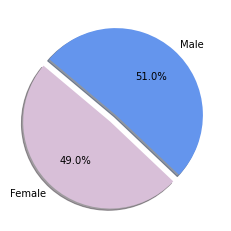

In [127]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["thistle", "cornflowerblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

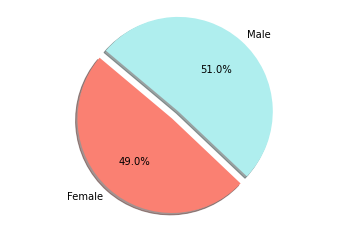

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pies = ["Female", "Male"]
sizes = [922, 958]
colors = ["salmon","paleturquoise"]
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
# plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


max_timepoint_info_df = clean_df[['Mouse ID', 'Timepoint']]
max_timepoint_groupby_df = max_timepoint_info_df.groupby('Mouse ID')
max_timepoint_df = max_timepoint_groupby_df.max()
# max_timepoint_df
# this is the max timepoint and the max tumor volume - I want the max timepoint and the tumor volume at that timepoint (merge with original df)

# left.merge(right, on='key', how='left')
# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df, how='left', on=['Mouse ID', 'Timepoint'])
final_tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
